In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [116]:
import pandas as pd
df = pd.read_excel("training_data.xlsx")
print(df)

      ID              Severity Ventilation  Mean Age  % Male  Any Comorbidity  \
0      1                   All        Both       NaN  0.6230           0.4760   
1      1  Severe/Critical Only        Both       NaN  0.7037           0.6667   
2      1                   All        Both       NaN  0.5912           0.4015   
3      2                   All        Both       NaN  0.6030              NaN   
4      2                   All        Both       NaN  0.6160              NaN   
..   ...                   ...         ...       ...     ...              ...   
470  197  Severe/Critical Only         NaN       NaN  0.6630              NaN   
471  198                   NaN        Both       NaN  0.6600              NaN   
472  199  Severe/Critical Only        Both      65.0  0.5900           0.7100   
473  199  Severe/Critical Only        Both      66.0  0.5600           0.7100   
474  199  Severe/Critical Only        Both      64.0  0.6500           0.7100   

     Hypertension  Diabetes

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 93 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [118]:
#df = df.drop(['CO'], axis= 1)
df.isnull().sum().max()
df.head(5)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning NaN

In [119]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['ID']
stringFeatures = ['Severity','Ventilation']
floatFeatures = ['Mean Age','% Male','Any Comorbidity','Hypertension','Diabetes',
                 'Cardiovascular Disease (incl. CAD)','Chronic obstructive lung (COPD)','Cancer (Any)','Liver Disease (any)',
                 'Cerebrovascular Disease','Chronic kidney/renal disease','Other','Fever (temperature ≥37·3°C)',
                 'Average temperature (celsius)','Max temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min','Cough',
                 'Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)','Myalgia (Muscle Pain)','Fatigue','Diarrhoea',
                 'Nausea or Vomiting','Loss of Appetite/Anorexia','Disease Severity Asymptomatic','Disease Severity General',
                 'Disease Severity Severe','Disease Severity Critical','White Blood Cell Count (10^9/L) - Median',
                 'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
                 'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','Platelet Count (10^9/L) - Median',
                 'Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ',
                 'Hemoglobin (g/L) - UQ','Albumin (g/L)','Alanine Aminotransferase (U/L)','Aspartate Aminotransferase (U/L)',
                 'Antibiotic','Antiviral (Any)','Heart failure','Acute kidney injury (AKI)','Secondary infection/ Bacterial infection',
                 'ICU length of stay, days','Hospital length of stay, days','Mortality'
]


# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(90)   

Error: Feature Unnamed: 55 not recognized.
Error: Feature Unnamed: 56 not recognized.
Error: Feature Unnamed: 57 not recognized.
Error: Feature Unnamed: 58 not recognized.
Error: Feature Unnamed: 59 not recognized.
Error: Feature Unnamed: 60 not recognized.
Error: Feature Unnamed: 61 not recognized.
Error: Feature Unnamed: 62 not recognized.
Error: Feature Unnamed: 63 not recognized.
Error: Feature Unnamed: 64 not recognized.
Error: Feature Unnamed: 65 not recognized.
Error: Feature Unnamed: 66 not recognized.
Error: Feature Unnamed: 67 not recognized.
Error: Feature Unnamed: 68 not recognized.
Error: Feature Unnamed: 69 not recognized.
Error: Feature Unnamed: 70 not recognized.
Error: Feature Unnamed: 71 not recognized.
Error: Feature Unnamed: 72 not recognized.
Error: Feature Unnamed: 73 not recognized.
Error: Feature Unnamed: 74 not recognized.
Error: Feature Unnamed: 75 not recognized.
Error: Feature Unnamed: 76 not recognized.
Error: Feature Unnamed: 77 not recognized.
Error: Feat

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1,All,Both,0.0,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,0.0,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,0.0,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,0.0,0.6030,0.0000,0.0000,0.1160,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,0.0,0.6160,0.0000,0.0000,0.1010,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,40,Mild only,NaN,0.0,0.4210,0.4210,0.0000,0.1580,0.1580,0.0530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,41,Mild only,NaN,0.0,0.5090,0.5260,0.2890,0.1320,0.0610,0.0440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,42,All,NaN,0.0,0.5570,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,42,Mild only,NaN,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#complete missing age with mean
df['Mean Age'].fillna(df['Mean Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Mean Age'])
s.loc[s<18] = df['Mean Age'].median()
df.loc['Mean Age'] = s
s = pd.Series(df['Mean Age'])
s.loc[s>120] = df['Mean Age'].median()
df.loc['Mean Age'] = s
df.head(5)
#Ranges of Age
#df.loc['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1.0,All,Both,10.0,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Severe/Critical Only,Both,10.0,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,All,Both,10.0,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,All,Both,10.0,0.6030,0.0000,0.0000,0.1160,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,All,Both,10.0,0.6160,0.0000,0.0000,0.1010,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df.head(10)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,0,0,0,0,168,81,103,103,55,26,...,4,7,3,11,10,4,10,15,0,0
1,0,7,0,0,199,99,141,137,110,51,...,4,7,3,11,10,4,10,15,0,0
2,0,0,0,0,154,70,78,77,9,12,...,4,7,3,11,10,4,10,15,0,0
3,76,0,0,0,160,0,0,65,0,0,...,4,7,3,11,10,4,10,15,0,0
4,76,0,0,0,165,0,0,52,0,0,...,4,7,3,11,10,4,10,15,0,0
5,76,0,0,0,153,0,0,72,0,0,...,4,7,3,11,10,4,10,15,0,0
6,86,0,0,68,109,35,40,67,67,68,...,4,7,3,11,10,4,10,15,0,0
7,86,0,0,45,8,38,30,106,102,49,...,4,7,3,11,10,4,10,15,0,0
8,86,0,0,64,109,30,4,51,30,75,...,4,7,3,11,10,4,10,15,0,0
9,86,0,0,77,188,47,75,51,67,63,...,4,7,3,11,10,4,10,15,0,0


In [122]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                               Total  Percent
ID                                 0      0.0
Unnamed: 59                        0      0.0
Unnamed: 68                        0      0.0
Unnamed: 67                        0      0.0
Unnamed: 66                        0      0.0
...                              ...      ...
Disease Severity General           0      0.0
Disease Severity Asymptomatic      0      0.0
Loss of Appetite/Anorexia          0      0.0
Nausea or Vomiting                 0      0.0
Unnamed: 92                        0      0.0

[93 rows x 2 columns]


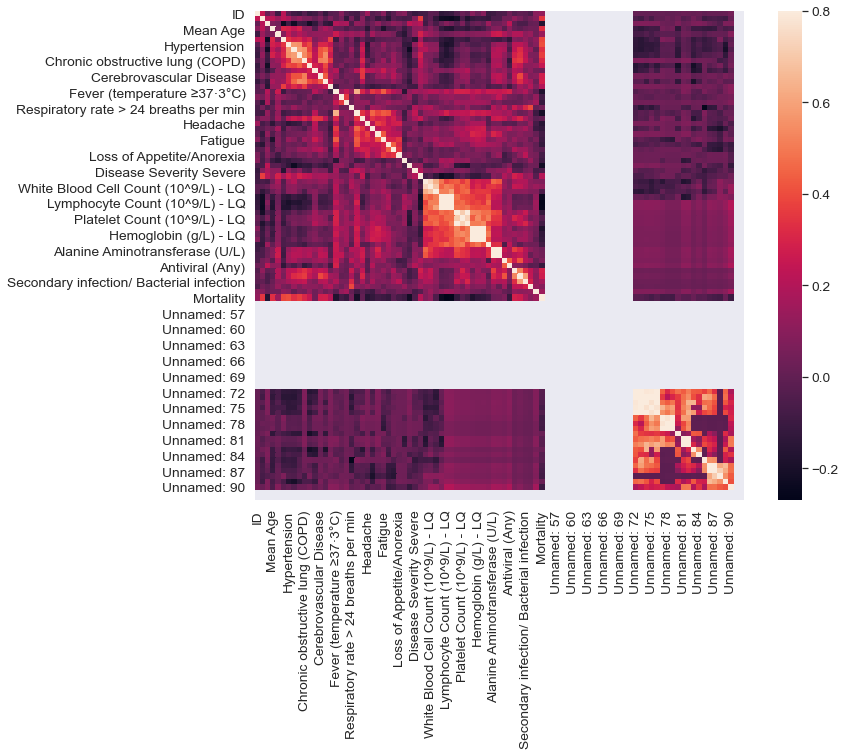

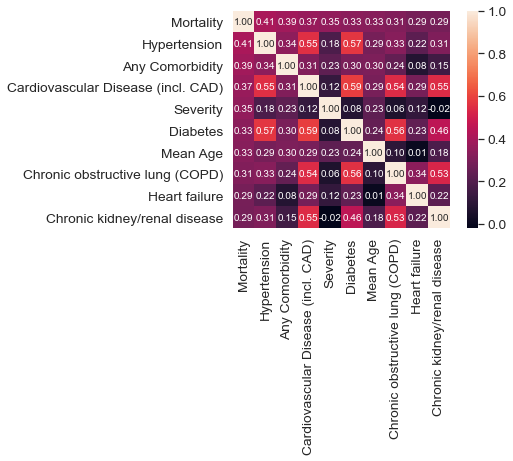

In [123]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Mortality')['Mortality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mortality')

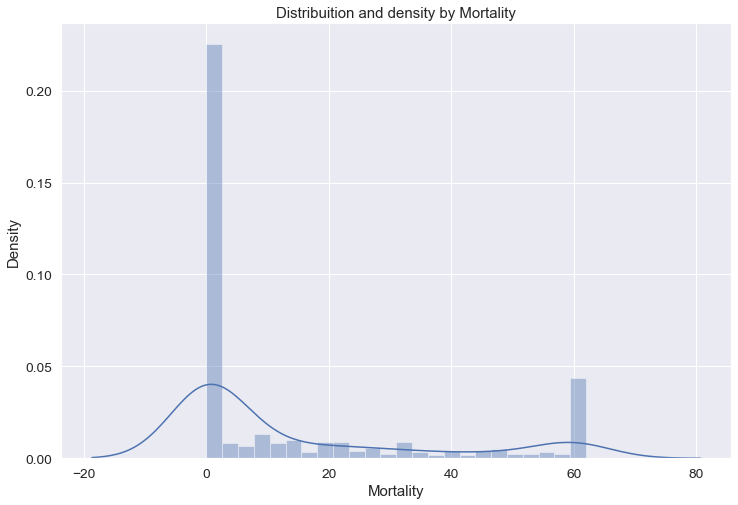

In [124]:
plt.figure(figsize=(12,8))
sns.distplot(df["Mortality"], bins=24)
plt.title("Distribuition and density by Mortality")
plt.xlabel("Mortality")

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `dis

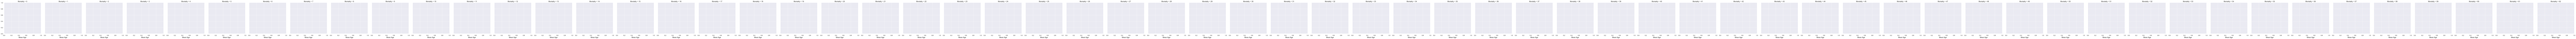

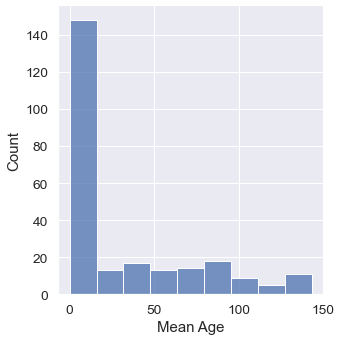

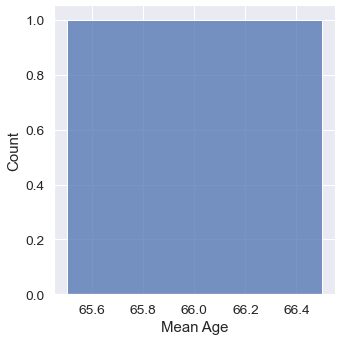

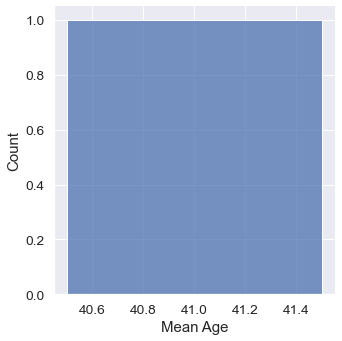

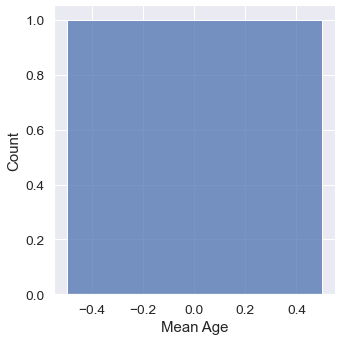

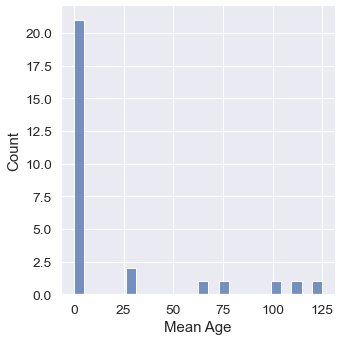

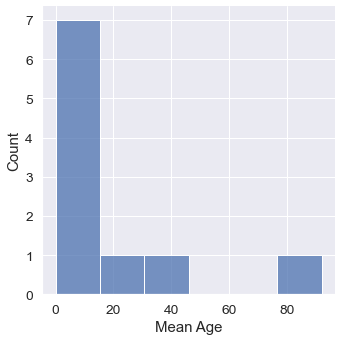

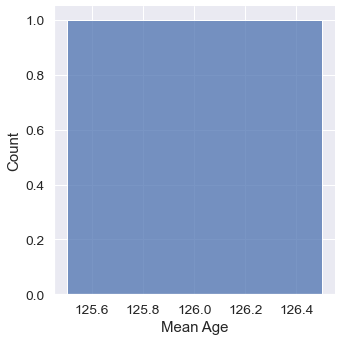

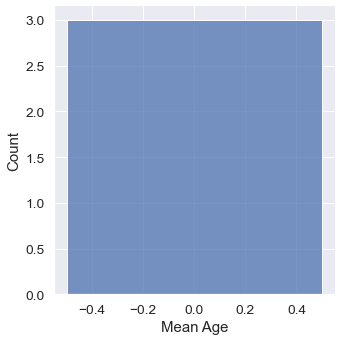

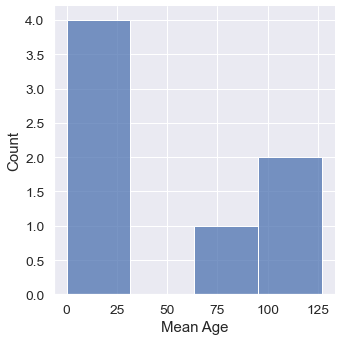

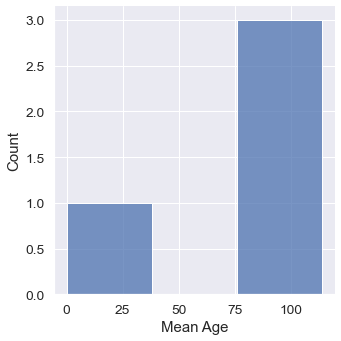

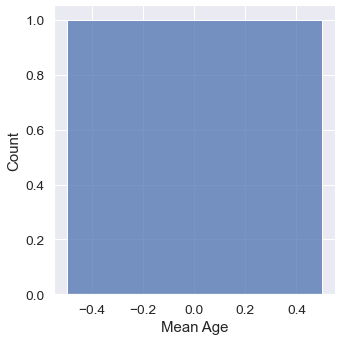

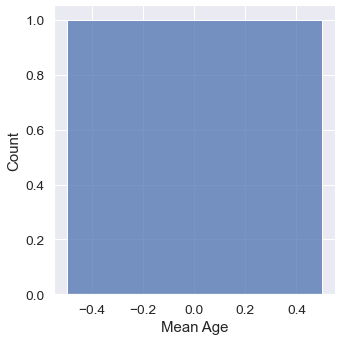

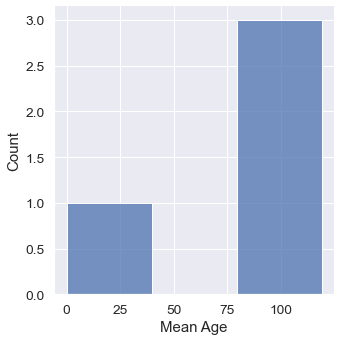

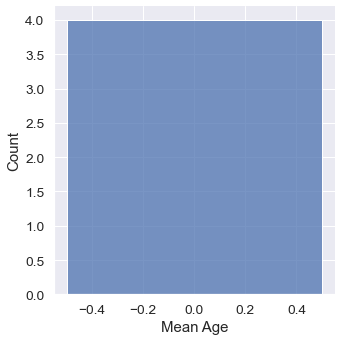

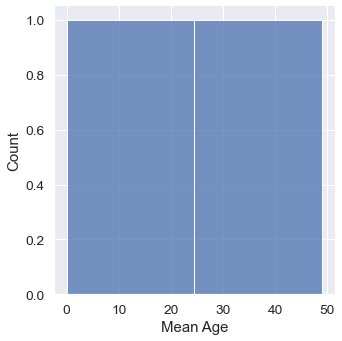

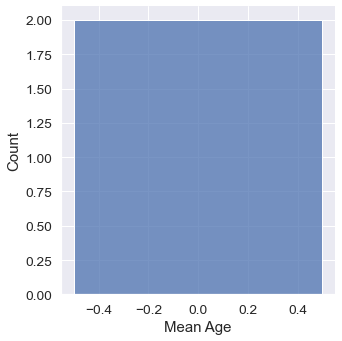

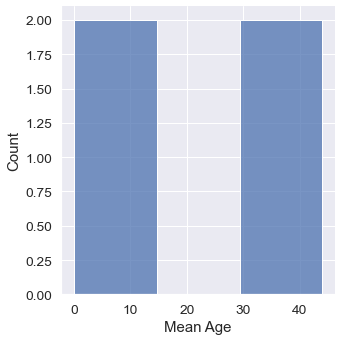

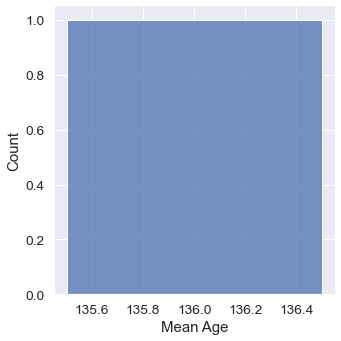

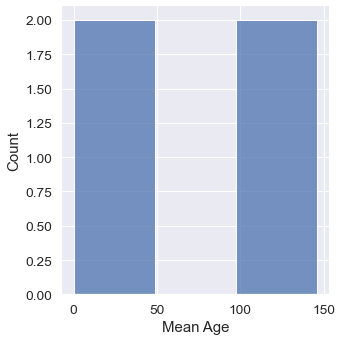

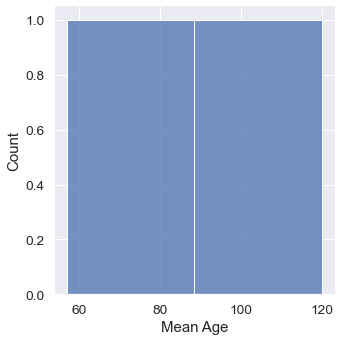

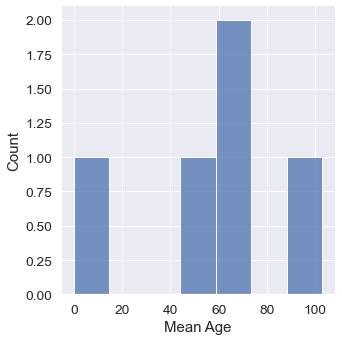

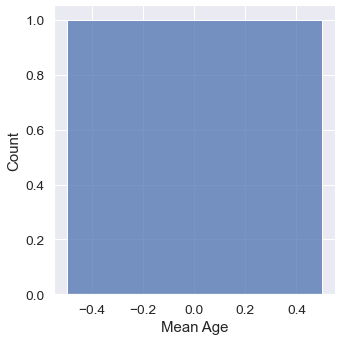

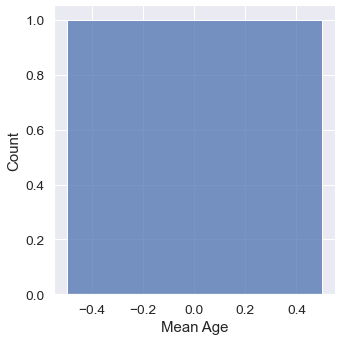

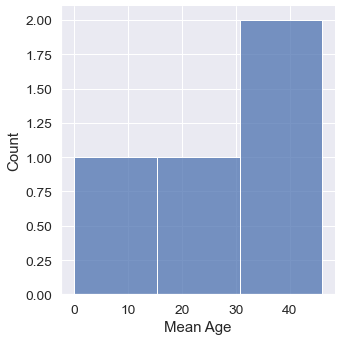

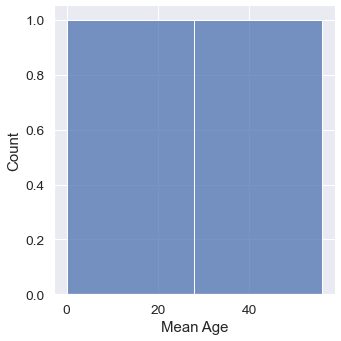

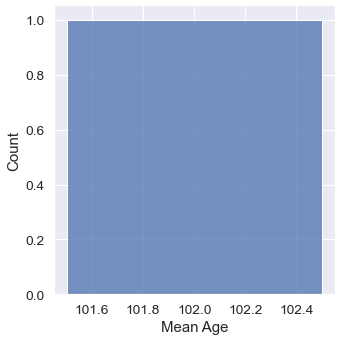

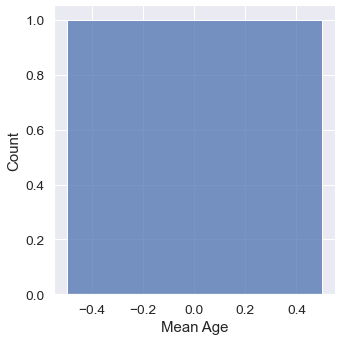

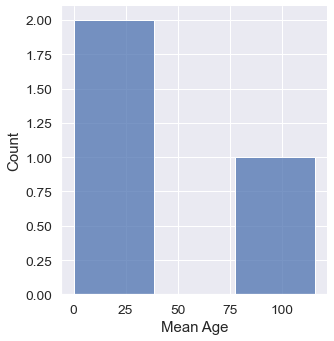

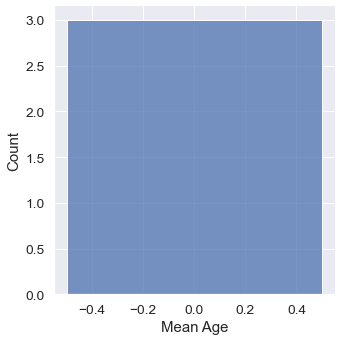

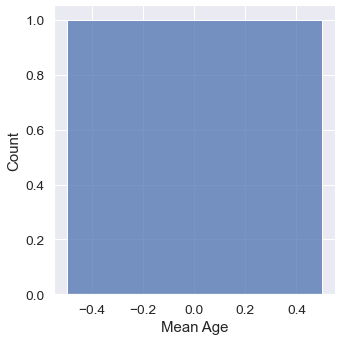

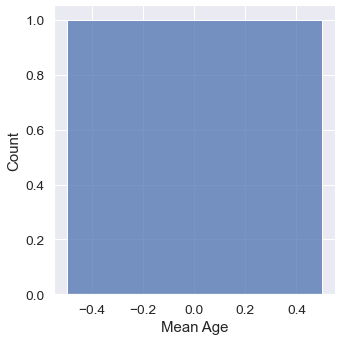

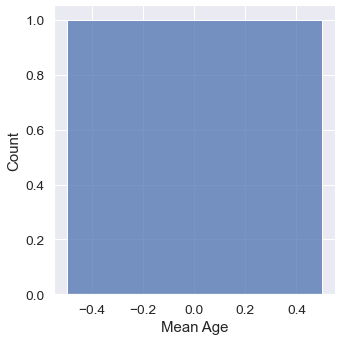

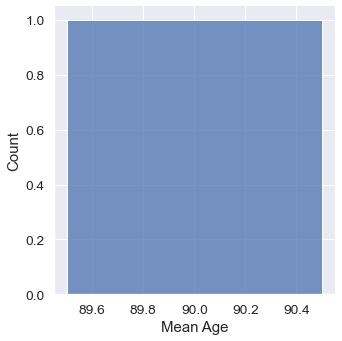

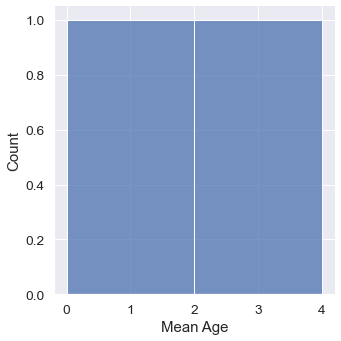

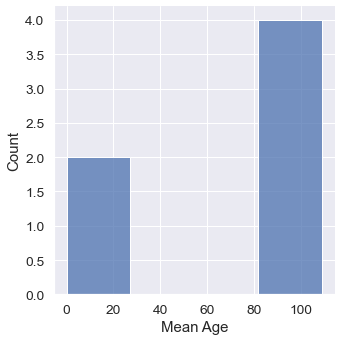

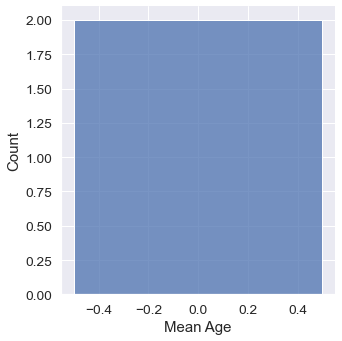

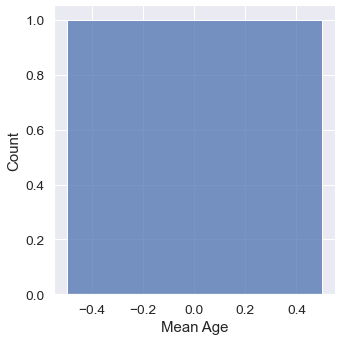

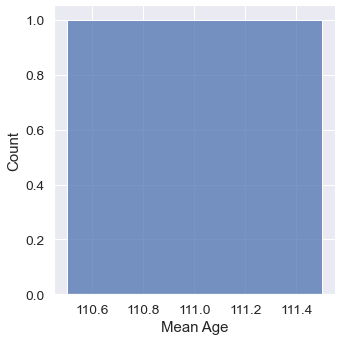

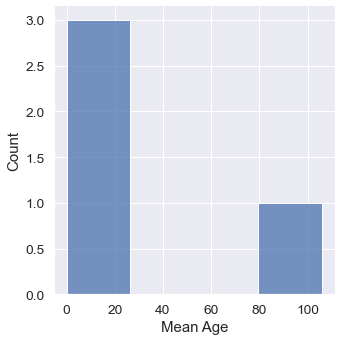

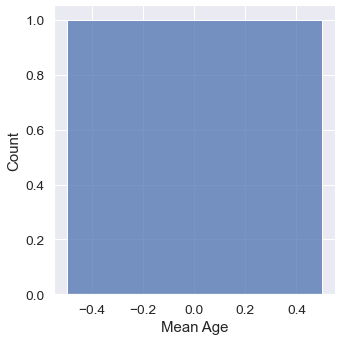

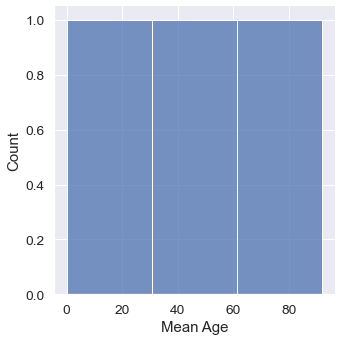

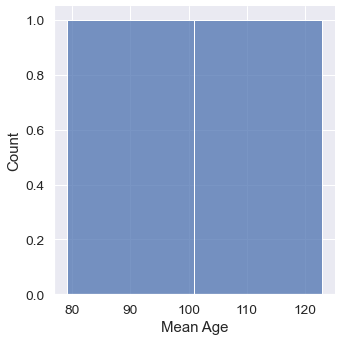

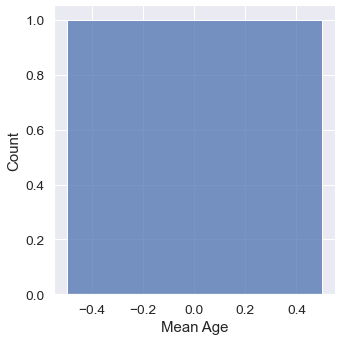

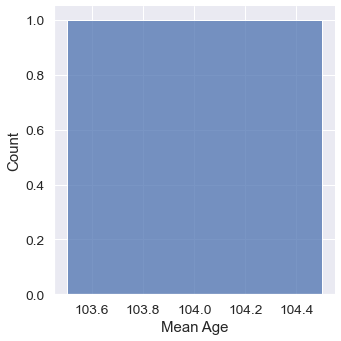

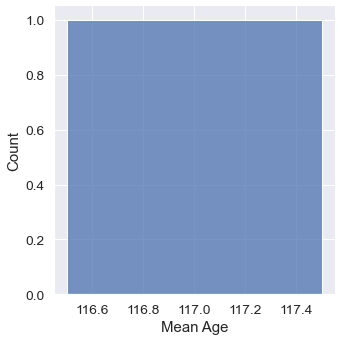

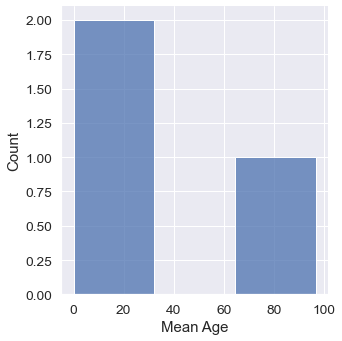

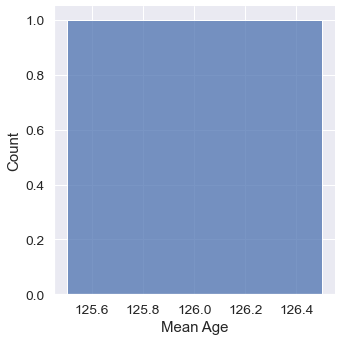

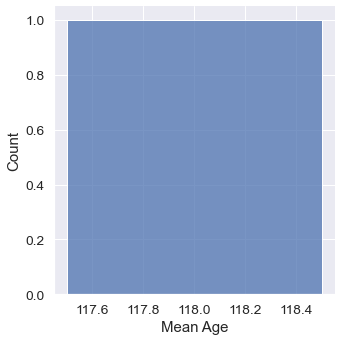

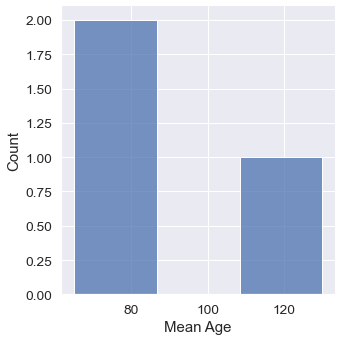

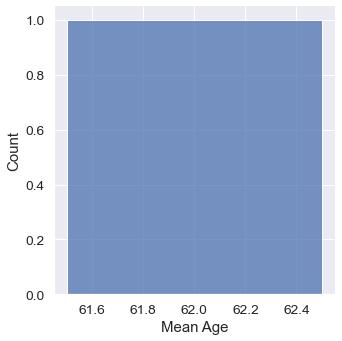

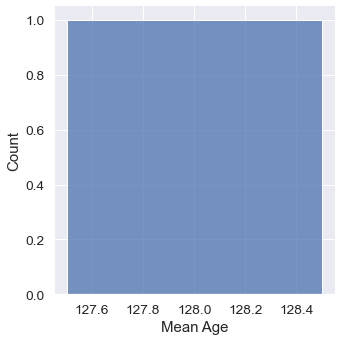

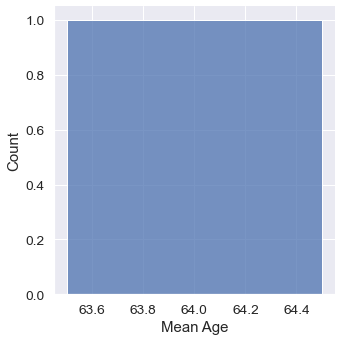

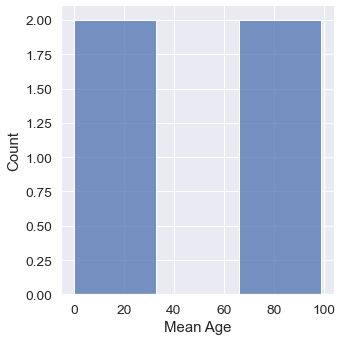

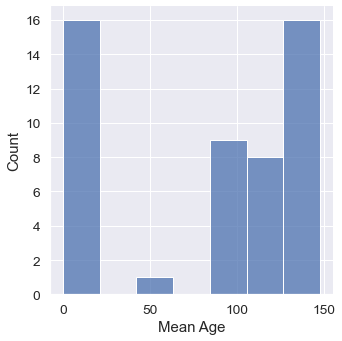

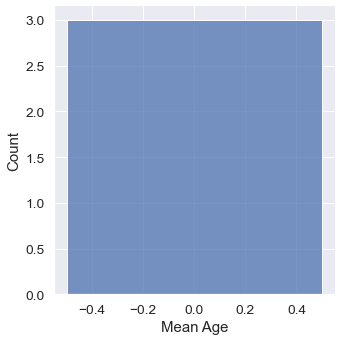

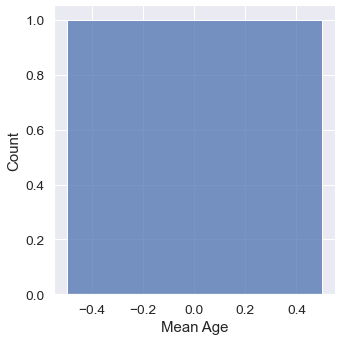

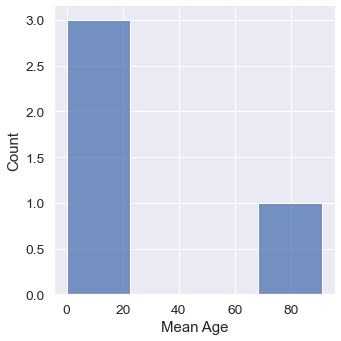

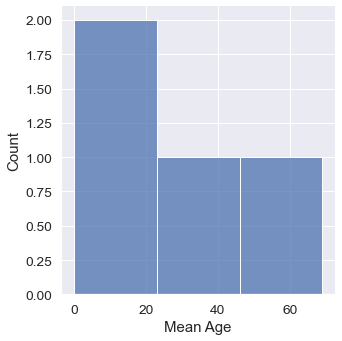

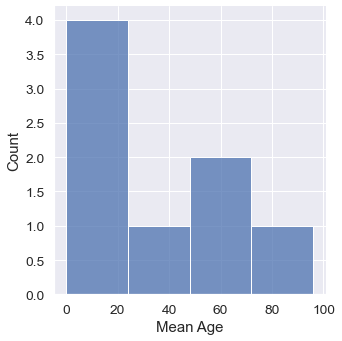

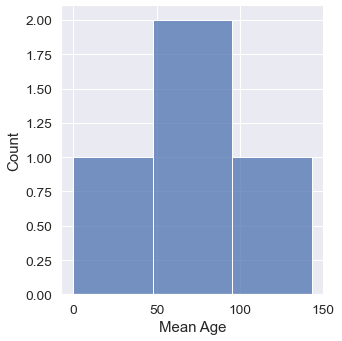

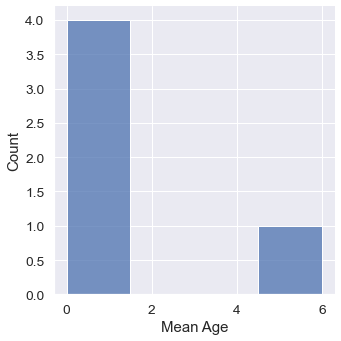

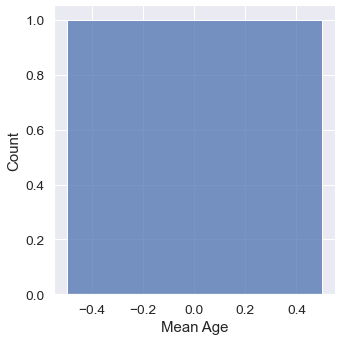

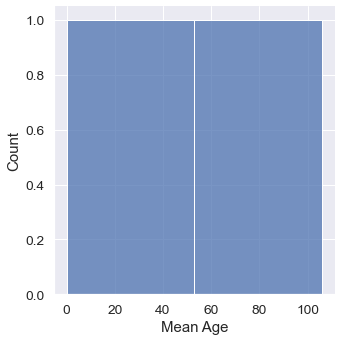

In [75]:
g = sns.FacetGrid(df, col='Mortality', size=5)
g = g.map(sns.displot, "Mean Age")

Text(0.5, 1.0, 'Total Distribuition')

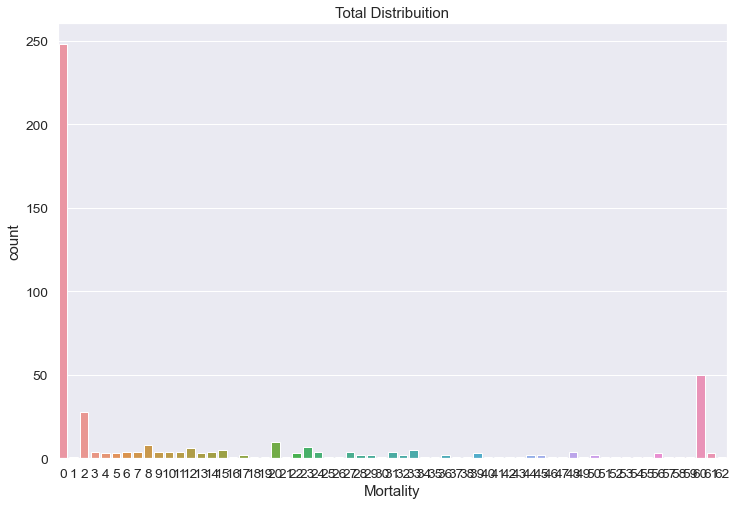

In [125]:
plt.figure(figsize=(12,8))
#labels = labelDict['label_Mean_Age']
g = sns.countplot(x="Mortality", data=df)
#g.set_xticklabels(labels)

plt.title('Total Distribuition')

In [107]:
# Scaling Age
scaler = MinMaxScaler()
df['Mean Age'] = scaler.fit_transform(df[['Mean Age']])
df.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,0,0.000000,0,0.0,119,115,37,19,31,3,...,4,7,3,5,3,4,3,13,0,0
1,0,0.777778,0,0.0,57,50,22,156,77,37,...,4,7,3,5,3,4,3,13,0,0
2,0,0.000000,0,0.0,100,25,130,94,64,28,...,4,7,3,5,3,4,3,13,0,0
3,1,0.000000,0,0.0,108,0,0,78,0,0,...,4,7,3,5,3,4,3,13,0,0
4,1,0.000000,0,0.0,116,0,0,2,0,0,...,4,7,3,5,3,4,3,13,0,0


In [126]:
# define X and y
feature_cols = ['ID','Severity','Ventilation','Mean Age','% Male','Any Comorbidity','Hypertension','Diabetes',
                 'Cardiovascular Disease (incl. CAD)','Chronic obstructive lung (COPD)','Cancer (Any)','Liver Disease (any)',
                 'Cerebrovascular Disease','Chronic kidney/renal disease','Other','Fever (temperature ≥37·3°C)',
                 'Average temperature (celsius)','Max temperature (celsius)','Max temperature (celsius)','Respiratory rate > 24 breaths per min','Cough',
                 'Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)','Myalgia (Muscle Pain)','Fatigue','Diarrhoea',
                 'Nausea or Vomiting','Loss of Appetite/Anorexia','Disease Severity Asymptomatic','Disease Severity General',
                 'Disease Severity Severe','Disease Severity Critical','White Blood Cell Count (10^9/L) - Median',
                 'White Blood Cell Count (10^9/L) - LQ','White Blood Cell Count (10^9/L) - UQ','Lymphocyte Count (10^9/L) - Median',
                 'Lymphocyte Count (10^9/L) - LQ','Lymphocyte Count (10^9/L) - UQ','Platelet Count (10^9/L) - Median',
                 'Platelet Count (10^9/L) - LQ','Platelet Count (10^9/L) - UQ','Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ',
                 'Hemoglobin (g/L) - UQ','Albumin (g/L)','Alanine Aminotransferase (U/L)','Aspartate Aminotransferase (U/L)',
                 'Antibiotic','Antiviral (Any)','Heart failure','Acute kidney injury (AKI)','Secondary infection/ Bacterial infection',
                 'ICU length of stay, days','Hospital length of stay, days']
X = df[feature_cols]
y = df.Mortality

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

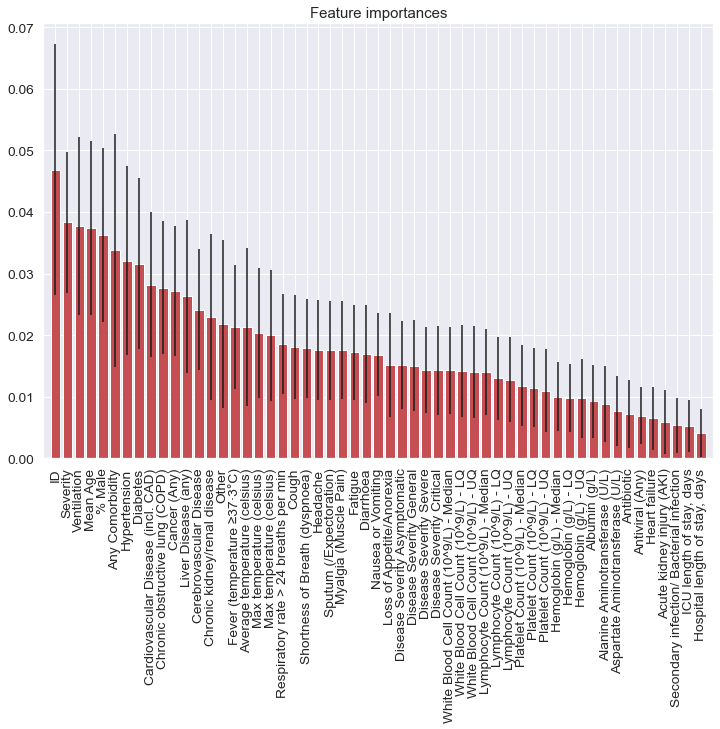

In [127]:
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [128]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [129]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [130]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [145]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)


In [146]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


########### Logistic Regression ###############
Accuracy: 0.47058823529411764
Null accuracy:
 0     56
60    20
2      5
3      4
23     3
14     2
33     2
15     2
24     2
6      2
7      2
11     2
13     1
54     1
52     1
49     1
48     1
44     1
43     1
35     1
32     1
30     1
29     1
28     1
5      1
8      1
20     1
19     1
27     1
Name: Mortality, dtype: int64
Percentage of ones: 17.201680672268907
Percentage of zeros: -16.201680672268907
True: [ 0  2  6  0  0 13  0 44  0 35  0  0 43  0 60  2  0  0  0  0 60 23  2 60
 60]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


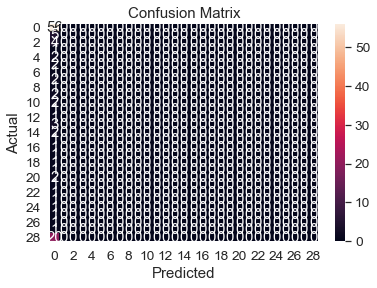

Classification Accuracy: 0.47058823529411764
Classification Error: 0.5294117647058824
False Positive Rate: 0.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [148]:
logisticRegression()

In [12]:
df1 = pd.read_excel("test_data.xlsx")
print(df1)

     ID              Severity           Ventilation   Mean Age  % Male  \
0   155             Mild only                  Both  48.900000  0.3410   
1   156  Severe/Critical Only                  Both        NaN  0.7500   
2   156  Severe/Critical Only      Ventilation only        NaN  0.7900   
3   156  Severe/Critical Only  Non-ventilation only        NaN  0.6800   
4   157                   All                  Both  52.943333  0.4654   
5   157                   All                  Both  44.740000  0.2927   
6   157                   All                  Both  52.680000  0.4938   
7   157                   All                  Both  61.410000  0.6098   
8   158                   All                  Both  36.020000  0.5198   
9   158                   All                  Both  40.500000  0.5880   
10  158                   All                  Both  26.500000  0.3750   
11  159                   All                   NaN  49.000000  0.4700   
12  159             Mild only         

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        53 non-null     int64  
 1   Severity                                  53 non-null     object 
 2   Ventilation                               46 non-null     object 
 3   Mean Age                                  36 non-null     float64
 4   % Male                                    45 non-null     float64
 5   Any Comorbidity                           14 non-null     float64
 6   Hypertension                              26 non-null     float64
 7   Diabetes                                  30 non-null     float64
 8   Cardiovascular Disease (incl. CAD)        35 non-null     float64
 9   Chronic obstructive lung (COPD)           24 non-null     float64
 10  Cancer (Any)                            

In [16]:
df1.fillna(0)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Unnamed: 54,Unnamed: 55
0,155,Mild only,Both,48.900000,0.3410,0.3250,0.1510,0.1190,0.0630,0.0000,...,23.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
1,156,Severe/Critical Only,Both,0.000000,0.7500,0.6800,0.2500,0.1700,0.1100,0.1100,...,36.0,0.000,1.000,0.000,0.060,0.000,10.0,16.0,0.0,0.0
2,156,Severe/Critical Only,Ventilation only,0.000000,0.7900,0.7400,0.2600,0.2400,0.1800,0.1500,...,39.0,0.000,1.000,0.000,0.050,0.000,12.0,17.0,0.0,0.0
3,156,Severe/Critical Only,Non-ventilation only,0.000000,0.6800,0.5800,0.2100,0.0500,0.0000,0.0500,...,35.0,0.000,1.000,0.000,0.060,0.000,0.0,13.0,0.0,0.0
4,157,All,Both,52.943333,0.4654,0.0000,0.2121,0.0938,0.0733,0.0327,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
5,157,All,Both,44.740000,0.2927,0.0000,0.1341,0.0610,0.0610,0.0244,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
6,157,All,Both,52.680000,0.4938,0.0000,0.1728,0.0741,0.0370,0.0494,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
7,157,All,Both,61.410000,0.6098,0.0000,0.3293,0.1463,0.1220,0.0244,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
8,158,All,Both,36.020000,0.5198,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
9,158,All,Both,40.500000,0.5880,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,11.5,0.0,0.0


In [21]:
df.fillna(0)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,1,All,Both,0.0,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
1,1,Severe/Critical Only,Both,0.0,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
2,1,All,Both,0.0,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
3,2,All,Both,0.0,0.6030,0.0000,0.0000,0.1160,0.0000,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
4,2,All,Both,0.0,0.6160,0.0000,0.0000,0.1010,0.0000,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,197,Severe/Critical Only,0,0.0,0.6630,0.0000,0.3880,0.1220,0.0920,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.68,0.0,0.0
471,198,0,Both,0.0,0.6600,0.0000,0.6300,0.3600,0.1900,0.0900,...,0.89,0.81,0.00,0.30,0.00,0.0,0.0,0.33,0.0,0.0
472,199,Severe/Critical Only,Both,65.0,0.5900,0.7100,0.4336,0.2368,0.0702,0.0000,...,0.00,0.00,0.06,0.01,0.05,0.0,25.0,0.14,0.0,0.0
473,199,Severe/Critical Only,Both,66.0,0.5600,0.7100,0.4600,0.2500,0.0900,0.0000,...,0.00,0.00,0.05,0.01,0.03,0.0,25.0,0.15,0.0,0.0


In [28]:
df.describe()

,ID,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
count,475.000000,252.000000,430.000000,222.00000,309.000000,325.000000,295.000000,262.000000,233.000000,192.000000,...,4.000000,9.000000,3.000000,13.000000,11.000000,8.000000,15.000000,36.000000,0.0,0.0
mean,94.324211,51.093536,0.547413,0.48413,0.286662,0.147790,0.142180,0.066283,0.075804,0.037113,...,0.807250,0.764589,0.066667,0.101615,0.177909,11.375000,20.873333,0.142222,NaN,NaN
std,51.058213,18.572915,0.263608,0.35929,0.288207,0.201715,0.241088,0.150995,0.212610,0.090475,...,0.169224,0.298162,0.020817,0.138349,0.219794,14.411677,10.863995,0.255568,NaN,NaN
min,1.000000,0.170000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.625000,0.000000,0.050000,0.000000,0.000000,0.000000,4.100000,0.000000,NaN,NaN
25%,58.500000,43.300000,0.451175,0.18050,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.691750,0.802300,0.055000,0.010000,0.040000,0.000000,15.500000,0.000000,NaN,NaN
50%,96.000000,52.450000,0.540600,0.40075,0.206000,0.101000,0.060500,0.017950,0.008000,0.000000,...,0.802000,0.810000,0.060000,0.026000,0.068000,7.500000,21.000000,0.010000,NaN,NaN
75%,131.500000,64.000000,0.670000,0.82000,0.395000,0.180000,0.150500,0.077675,0.052000,0.040000,...,0.917500,0.846000,0.075000,0.200000,0.237000,14.500000,24.500000,0.210000,NaN,NaN
max,199.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.090000,0.421000,0.600000,34.000000,52.000000,1.000000,NaN,NaN


In [31]:
df2 = df.dropna(axis=1)
print(df2)

      ID Mortality
0      1      0.28
1      1         1
2      1         0
3      2      0.16
4      2      0.15
..   ...       ...
470  197      0.56
471  198      0.58
472  199         1
473  199         0
474  199         0

[475 rows x 2 columns]


In [34]:
df2

,ID,Mortality
0,1,0.28
1,1,1
2,1,0
3,2,0.16
4,2,0.15
...,...,...
470,197,0.56
471,198,0.58
472,199,1
473,199,0


In [37]:
df2.to_csv(r'C:\Users\Administrator\OneDrive\Desktop\Data science material\Hackathon\HackathoneFile.csv',index=False)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

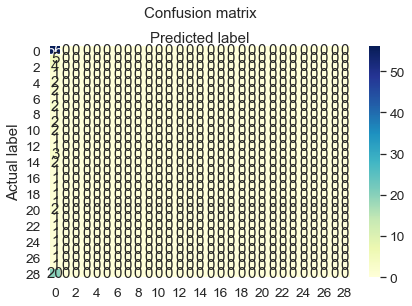

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#split dataset in features and target variable
feature_cols = ['ID']
X = df[feature_cols] # Features
y = df['Mortality'] # Target variable

#################################################


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


###########################################



# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

##############################################
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
###########################################


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#position : {'top', 'bottom'}

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred,True))
print("Precision:",metrics.precision_score(y_test, y_pred,True))
print("Recall:",metrics.recall_score(y_test, y_pred))


y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()